In [2]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [16]:
#%%writefile plot_kde.py
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

fn = '../../results/main/22Rv1/hicnv/tech_run/22Rv1_SRR7760384_hicnv/Kernel_Smoothing/22Rv1.SRR7760384.chr1.kde2d_x.txt'
xdata = pd.read_table(fn, header=None, squeeze=True)

fn = '../../results/main/22Rv1/hicnv/tech_run/22Rv1_SRR7760384_hicnv/Kernel_Smoothing/22Rv1.SRR7760384.chr1.kde2d_y.txt'
ydata = pd.read_table(fn, header=None, squeeze=True)

fn = '../../results/main/22Rv1/hicnv/tech_run/22Rv1_SRR7760384_hicnv/Kernel_Smoothing/22Rv1.SRR7760384.chr1.kde2d_z.txt'
zdata = pd.read_table(fn, header=None, squeeze=True)

# transpose the matrix so that genomic positions are present as column
zdata = zdata.transpose()

# rename the columns and rows
zdata.columns = xdata
zdata.index = ydata

zdata = zdata.iloc[:, 0:10000]

# melt the data to transform from the matrix format into a 
# tabular format
ztabular = zdata.melt(ignore_index=False, var_name='genome_pos', value_name='density')

# assign a column for read counts
ztabular['read_counts'] = ztabular.index

# re-organize the columns
ztabular = ztabular[['genome_pos', 'read_counts', 'density']] 

In [22]:
ztabular.density.max()

3.7288477288534397e-07

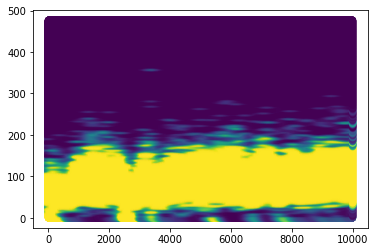

In [26]:
# plot a scatter plot
fig, ax = plt.subplots()
ax.scatter(ztabular.genome_pos, ztabular.read_counts, c=ztabular.density, vmin=0, vmax=5e-8, cmap=plt.cm.viridis)

#fig.savefig('test.plot.png')

(array([[5.42599590e-03, 1.11156735e-02, 2.56242148e-03, 3.69604447e-04,
         4.87014250e-05, 4.17020039e-07, 1.39029209e-19, 1.41424724e-19,
         1.82243605e-19, 2.90284147e-19],
        [2.42159017e-03, 9.02565056e-03, 7.26118743e-03, 2.07367049e-03,
         4.12670635e-04, 5.19860775e-05, 1.38661940e-19, 1.39588383e-19,
         2.40113988e-19, 2.73687595e-19],
        [4.64210686e-03, 9.42117452e-03, 5.57584633e-03, 1.32673253e-03,
         1.83473990e-04, 1.59057882e-05, 6.55388060e-10, 1.94278527e-07,
         2.33868775e-19, 2.50154306e-19],
        [4.28735677e-03, 1.03524922e-02, 5.06106811e-03, 1.27111491e-03,
         1.56650644e-04, 4.37467586e-05, 1.47111397e-07, 4.21833346e-05,
         2.03425219e-19, 3.22868445e-19],
        [1.99622578e-03, 9.19524483e-03, 7.63632225e-03, 2.17365123e-03,
         2.33771620e-04, 1.00387373e-05, 4.57481108e-10, 1.26624846e-07,
         1.70950936e-19, 2.83512846e-19],
        [2.12528918e-03, 8.52261555e-03, 7.53620498e-03, 2.6

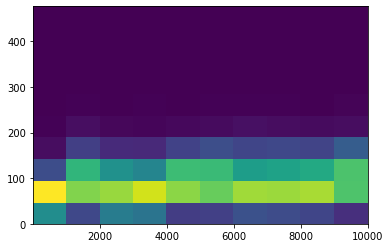

In [19]:
# fig, ax = plt.subplots()
# ax.hist2d(ztabular.genome_pos, ztabular.read_counts, weights=ztabular.density, cmap=plt.cm.viridis)

## Bivariate plot with multiple elements

https://seaborn.pydata.org/examples/layered_bivariate_plot.html

In [3]:
# Simulate data from a bivariate Gaussian
n = 10000
mean = [0, 0]
cov = [(2, .4), (.4, .2)]
rng = np.random.RandomState(0)
x, y = rng.multivariate_normal(mean, cov, n).T

/mnt/BioHome/jreyna/software/anaconda3/envs/hic_tls/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

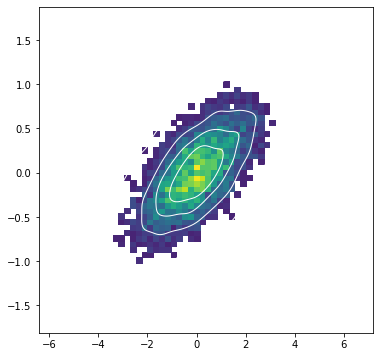

In [8]:
# Draw a combo histogram and scatterplot with density contours
f, ax = plt.subplots(figsize=(6, 6))
#sns.scatterplot(x, y, s=5, color=".15")
#sns.histplot(x=x, y=y, bins=50, pthresh=.1, cmap="viridis")
sns.kdeplot(x, y, levels=5, color="w", linewidths=1)